In [19]:
import pandas as pd
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
import os
import seaborn as sns

# Go up one directory to get to master/
project_root = str(Path.cwd().parent)
sys.path.append(project_root)


In [ ]:
def get_solutions_allruns_allfolds_refact_rollOCT(name_dataset: str, folds_available = 10, runs = 10, depth = 8) -> dict:
    sol_dict = {}
    for run in range(1,runs+1):
        sol_dict[run] = {}
        for fold in range(1,folds_available+1):
            sol_dict[run][fold] = pd.read_csv(f"../results/tree_comparison/refactored_rollOCT_d{depth}/{name_dataset}/run{run}/fold{fold}_{name_dataset}_result_test_run{run}.csv")
    return sol_dict

In [ ]:
def get_solutions_allruns_allfolds_old_rollOCT(name_dataset: str, folds_available = 10, runs = 10, depth = 8) -> dict:
    sol_dict = {}
    for run in range(1,runs+1):
        sol_dict[run] = {}
        for fold in range(1,folds_available+1):
            sol_dict[run][fold] = pd.read_csv(f"../results/tree_comparison/old_rollOCT_d{depth}/{name_dataset}/run{run}/fold{fold}_{name_dataset}_result_test_run{run}.csv")
    return sol_dict

avg mcc über alle fold pro run => ein mcc pro run => #runs mcc Werte

In [ ]:
def get_mcc_list_refact_rollOCT(dataset_name, folds_available=10, runs = 10, depth = 8):
    sol_dict = get_solutions_allruns_allfolds_refact_rollOCT(name_dataset=dataset_name, folds_available = folds_available, runs = runs, depth = depth)
    
    mcc_scores = []

    for run in range(1, runs+1):
        run_mcc_list = [] #mcc's over all folds for this run
        for fold in range(1, folds_available+1):
            
            y_true_test = sol_dict[run][fold]['y']
            y_predict_test = sol_dict[run][fold]['prediction']

            
            mcc_test = matthews_corrcoef(y_true_test, y_predict_test) #For a multiclass problem, sklearn.metrics.matthews_corrcoef returns a single float value representing the overall Matthews correlation coefficient (MCC) across all classes
            run_mcc_list.append(mcc_test)
        avg_mcc_run = np.mean(run_mcc_list)
        mcc_scores.append(avg_mcc_run)
    return mcc_scores

In [ ]:
def get_mcc_list_old_rollOCT(dataset_name, folds_available=10, runs = 10, depth =8):
    sol_dict = get_solutions_allruns_allfolds_old_rollOCT(name_dataset=dataset_name, folds_available = folds_available, runs = runs, depth=depth)
    
    mcc_scores = []

    for run in range(1, runs+1):
        run_mcc_list = [] #mcc's over all folds for this run
        for fold in range(1, folds_available+1):
            
            y_true_test = sol_dict[run][fold]['y']
            y_predict_test = sol_dict[run][fold]['prediction']

            
            mcc_test = matthews_corrcoef(y_true_test, y_predict_test) #For a multiclass problem, sklearn.metrics.matthews_corrcoef returns a single float value representing the overall Matthews correlation coefficient (MCC) across all classes
            run_mcc_list.append(mcc_test)
        avg_mcc_run = np.mean(run_mcc_list)
        mcc_scores.append(avg_mcc_run)
    return mcc_scores

In [ ]:
def mcc_dict_both_trees(list_names, folds = 10, runs =10, depth = 8):
    mcc_dict = dict() #entry contains list with #folds values
    for i, name in enumerate(list_names):
        mcc_dict[name] = dict()
        mcc_scores_refact_rollOCT = get_mcc_list_refact_rollOCT(dataset_name = name, folds_available=folds, runs = runs, depth=depth)
        mcc_scores_old_rollOCT = get_mcc_list_old_rollOCT(dataset_name = name, folds_available=folds, runs = runs, depth=depth)
        mcc_dict[name]['refactored_rollOCT'] = mcc_scores_refact_rollOCT
        mcc_dict[name]['original_rollOCT'] = mcc_scores_old_rollOCT
    return mcc_dict

In [ ]:
def figure_mcc_seaborne_comparison(list_names, alias_dict = dict(), folds_tree = 10, runs = 10, depth = 8):
    mcc_dict = mcc_dict_both_trees(list_names = list_names, folds= folds_tree, runs = runs, depth=depth)
    data = []
    for name in list_names:
        for mcc_type in ['original_rollOCT', 'refactored_rollOCT']:
            for value in mcc_dict[name][mcc_type]:
                data.append({
                    'Dataset': alias_dict.get(name, name),
                    'Type': mcc_type,
                    'mcc': value
                })
    df = pd.DataFrame(data)

    print(data)

    fig = plt.figure(figsize=(15, 6))
    sns.boxplot(x='Dataset', y='mcc', hue='Type', data=df, linewidth=1, width=0.6, dodge=True, palette='colorblind')
    plt.title(f"mcc; tree depth 8")
    fig.savefig(os.path.join('../results/tree_comparison', f'tree_comparison_d8.png'))
    plt.show()

In [26]:
list_names = ['breast+cancer+wisconsin+diagnostic', 'car_evaluation', 'mushroom', 'nursery', 'seismic', 'spambase', 'wine', 'banknote+authentication', 'chess+king+rook+vs+king+pawn', 'monk1', 'monk2', 'monk3']

alias_dict = {
    'breast+cancer+wisconsin+diagnostic' : 'bcwd',
    'car_evaluation' : 'car_eval',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'chess',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}

[{'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8336699217321627)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8397921731629658)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8455184174098471)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8287649557151535)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8316753909454221)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8354828839056531)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8438552775517966)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8373234699636736)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8591525477858903)}, {'Dataset': 'bcwd', 'Type': 'original_rollOCT', 'mcc': np.float64(0.8609518751720404)}, {'Dataset': 'bcwd', 'Type': 'refactored_rollOCT', 'mcc': np.float64(0.8214985276746324)}, {'Dataset': 'bcwd', 'Type': '

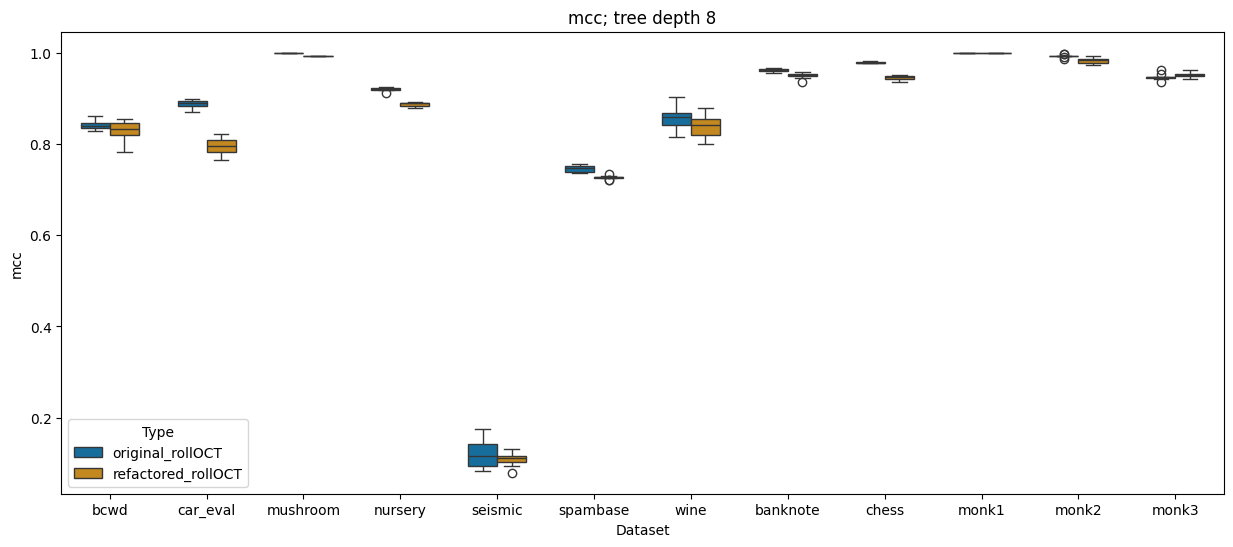

In [ ]:
figure_mcc_seaborne_comparison(list_names = list_names, alias_dict = alias_dict, folds_tree = 10, runs = 10, depth = 8)